In [10]:
import os
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import numpy as np

from scipy.stats import zscore

#hide warnings
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [11]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: d:\Projects\repos\tu060\tests


In [12]:
path = './../sim-notebook/'

In [13]:
files = ['reward_capacity.csv']

In [14]:
df_rewards = pd.read_csv(path+files[0])

In [15]:
unique_categories = df_rewards['capacity'].unique()

In [16]:
for category in unique_categories:
    print(category)

1M
500k
100k
50k
10k
5k
1k
500


### Bulk Statistical Testing Function

In [17]:
def statisticalTesting(file):
    #date = file.split('_')[0:6]  # Extract the date portion e.g 2023_6_10_16_17_17_atari_space_invaders.csv
    #date_string = '_'.join(date)  # Reconstruct the date string
    #title = file.replace(date_string + '_', '').replace('.csv', '')  # Remove the date portion from the original string # Remove the date and ".csv" extension
    #title = title.replace('_', ' ').capitalize()
    title = "Capacity Reward Density"
    #print(title.capitalize() + " Sim")

    #import data
    df_rewards = pd.read_csv(file)
    print("Index: " + str(df_rewards.index))


    #print boxplot to plot mean reward
    #ax = sns.boxplot(x='capacity', y='reward', data=df_rewards, color='#77B150', width=0.5).set(title=title.capitalize() + ' Simulator: Box Plot of Rewards by Capacity Size')
    #plt.show()

    # Plot density plot of mean reward 
        #doesn't work on cat vars need to convert
    mapping = {
        '1M': 1000000,
        '500k': 500000,
        '100k': 100000,
        '50k': 50000,
        '10k': 10000,
        '5k': 5000,
        '1k': 1000,
        '500': 500
    }
    # Replace the strings with numeric values
    df_rewards['capacity'] = df_rewards['capacity'].replace(mapping)

    # Calculate z-scores for the rewards within each capacity level
    df_rewards['zscore'] = df_rewards.groupby('capacity')['reward'].transform(zscore)

    #plot overlapping density plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed

    # Define line styles and colors for each capacity
    line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':']
    line_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

    capacities = df_rewards['capacity'].unique() #Get unique capacity values    
    # Create the overlapping density curve chart
    for i, capacity in enumerate(capacities):
        #ax = sns.distplot(df_rewards[df_rewards['capacity'] == capacity]['reward'],
        #                hist=False, kde=True,
        #                label=f'Capacity {capacity}',
        #                kde_kws={'linestyle': line_styles[i], 'color': line_colors[i], 'fill': True, 'alpha': 0.5})
        """
        ax = sns.distplot(df_rewards[df_rewards['capacity'] == capacity]['zscore'],
                          hist=False, kde=True,
                          label=f'Capacity {capacity}',
                          kde_kws={'linestyle': line_styles[i], 'color': line_colors[i], 'fill': True, 'alpha': 0.5})
        """
        capacity_label = f'Capacity {capacity:,}' 
        ax = sns.distplot(df_rewards[df_rewards['capacity'] == capacity]['reward'],
                        hist=False, kde=True,
                        label=capacity_label,
                        kde_kws={'linestyle': line_styles[i], 'color': line_colors[i], 'fill': False, 'alpha': 0.5})

    sns.set(style="whitegrid") # Set the style for the plots (optional)
    ax.set(title=title.capitalize()) # + ' Simulator: Density Plot of Rewards by Capacity Size'
    plt.xlabel('Reward')
    plt.ylabel('Density')
    plt.legend(loc='upper right') # Add a legend
    plt.savefig('./../plots/density/'+ title.lower() +'.png', dpi=300)  # Specify the desired file path and DPI # Save the plot as a PNG file
    plt.show()

    # Plot kde plot for univariate 
    #ax = sns.kdeplot(data=df_rewards, x='capacity', y='reward', fill=True, cmap='Blues', shade=True)
    
    #ax.set(title=title.capitalize()) # + ' Simulator: Density Plot of Rewards by Capacity Size'

    # Set x-axis limit from 500 to 1 million
   # plt.xlim(500, 1000000)  

    # Save the plot as a PNG file
    #plt.savefig('./../plots/kde/'+ title.lower() +'.png', dpi=300)  # Specify the desired file path and DPI

    #plt.show()

    # Plot density plot for bivariate 
    #ax = sns.kdeplot(data=df_rewards, x='reward', fill=True, color='blue', shade=True)#capacity
    #ax.set(title=title.capitalize() + ' Simulator: Density Plot of Capacity')
    #plt.show()

    # Plot density plot (violin plot)
    #ax = sns.violinplot(x='capacity', y='reward', data=df_rewards, palette='Blues')
    #ax.set(title=title.capitalize() + ' Simulator: Density Plot of Rewards by Capacity Size')
    #plt.show()

    print("\nShapiro-Wilk test")
    # The Shapiro-Wilk test, tests the null hypothesis that the data was drawn from a normal distribution this is an ANOVA assumption
    shapiro_test = stats.shapiro(df_rewards.reward.values) #(p 5%)
    print(shapiro_test)
    print(shapiro_test.statistic)
    print(shapiro_test.pvalue) #reject if less than 0.05

    if(shapiro_test.pvalue <1.0):
        print("\nKruskal-Wallis test")
        # Group the data by capacity
        grouped_data = df_rewards.groupby('capacity')['reward']

        # Create a list to store the data for each group
        groups = []

        # Iterate over the groups and extract the corresponding data
        for group, data in grouped_data:
            groups.append(data)

        # Perform Kruskal-Wallis test
        statistic, p_value = stats.kruskal(*groups)

        # Print the test statistic and p-value
        print("Kruskal-Wallis Test Statistic:", statistic)
        print("p-value:", p_value)

            # Perform Dunn's test
        print("\nDunn's Post Hoc Test")

        result = sp.posthoc_dunn(df_rewards, val_col='reward', group_col='capacity')

        # Print the pairwise comparison results
        """
        table shows pair wise results for different capacity groups:
        * 1.0 indicates no significant difference and no evidence to reject the null hypothesis
        * 0.0 indicate significant difference and to reject the null hypothesis.
        * For values between 0 and 1, smaller values indicate stronger evidence against the null hypothesis and a higher likelihood of a true difference between the groups.
        """
        print(result)


## Statistical Testing

Index: RangeIndex(start=0, stop=32000, step=1)


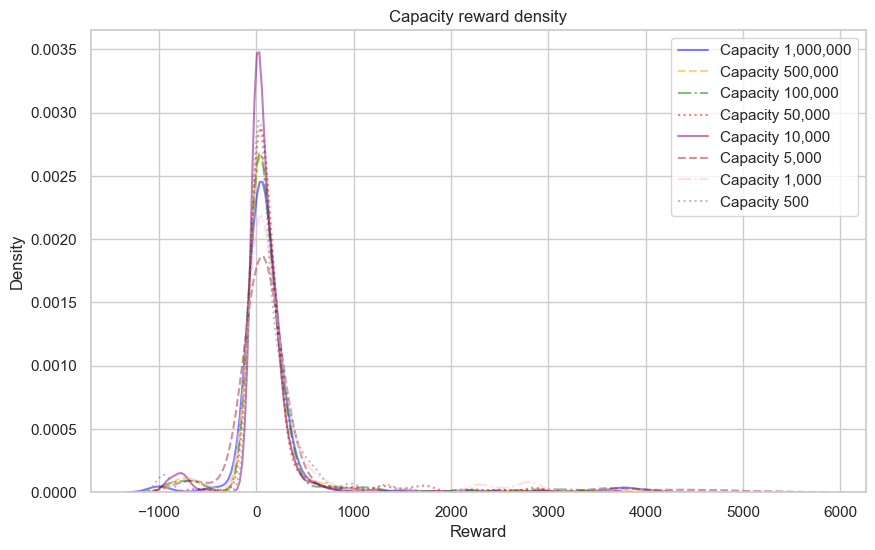


Shapiro-Wilk test
ShapiroResult(statistic=0.46251773834228516, pvalue=0.0)
0.46251773834228516
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 186.52339811943796
p-value: 8.152909749822453e-37

Dunn's Post Hoc Test
              500           1000          5000          10000         50000     
500      1.000000e+00  4.801635e-01  5.780593e-18  5.324741e-18  9.156435e-04  \
1000     4.801635e-01  1.000000e+00  2.177958e-15  2.019361e-15  9.075397e-03   
5000     5.780593e-18  2.177958e-15  1.000000e+00  9.925135e-01  1.028774e-07   
10000    5.324741e-18  2.019361e-15  9.925135e-01  1.000000e+00  9.770050e-08   
50000    9.156435e-04  9.075397e-03  1.028774e-07  9.770050e-08  1.000000e+00   
100000   2.715588e-13  4.063136e-11  1.838445e-01  1.807682e-01  6.536488e-05   
500000   2.223764e-19  1.080407e-16  7.152382e-01  7.222546e-01  1.297477e-08   
1000000  1.108884e-08  5.524643e-07  3.459721e-03  3.356862e-03  1.648787e-02   

              100000        500000        1000

In [18]:
for f in files:
    fl = path+f #file location
    statisticalTesting(fl)